# Checkpoint 8 - Clustering

## Part A - Explore Data 

---

In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading File
data_frame = pd.read_csv(r'CC GENERAL.csv')

#Display data
data_frame.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#Data Length
data_frame.shape

(8950, 18)

In [4]:
#Data description
data_frame.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
#Drop 'Cust_ID'
data_frame.drop("CUST_ID", axis=1, inplace=True)
data_frame.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
#Counting missing values
data_frame.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

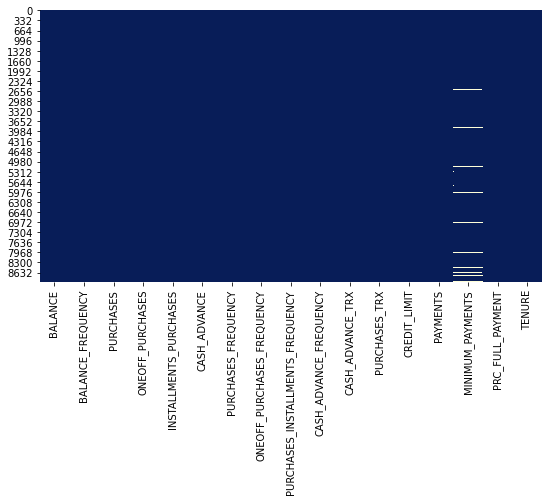

In [7]:
#Finding Missing Values

fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(data_frame.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [8]:
data_frame['CREDIT_LIMIT'].value_counts()

3000.0    784
1500.0    722
1200.0    621
1000.0    614
2500.0    612
         ... 
50.0        1
9700.0      1
6850.0      1
5450.0      1
3650.0      1
Name: CREDIT_LIMIT, Length: 205, dtype: int64

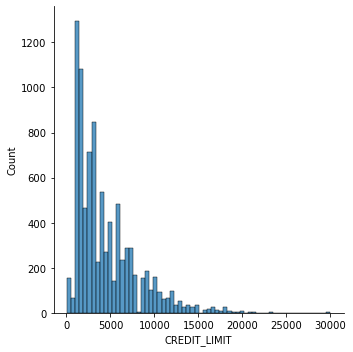

In [10]:
#Plotting CREDIT LIMIT

sns.displot(data_frame['CREDIT_LIMIT'])
plt.show()

In [63]:
#Replace Nan Values
data_frame['CREDIT_LIMIT'].fillna(data_frame['CREDIT_LIMIT'].mean(),inplace=True)

In [64]:
#Counting missing values
data_frame.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

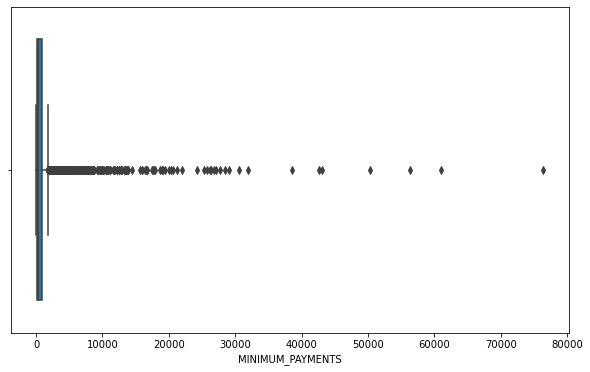

In [65]:
#Plotting Minimum Payments

fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(data=data_frame, x='MINIMUM_PAYMENTS')
plt.show()

In [66]:
data_frame['MINIMUM_PAYMENTS'].value_counts()

299.351881     2
3.197940       1
111.691332     1
129.682608     1
872.760983     1
              ..
1227.773229    1
127.210691     1
6422.472544    1
471.940554     1
189.459157     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64

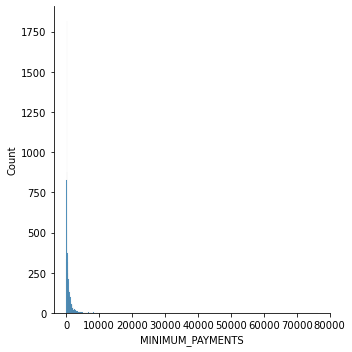

In [67]:
#Plotting Minimum Payments
sns.displot(data_frame['MINIMUM_PAYMENTS'])
plt.show()

In [68]:
#Replace Nan Values
data_frame['MINIMUM_PAYMENTS'].fillna(0,inplace=True)

In [69]:
#Counting missing values
data_frame.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Feature Scalling

In [70]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
X = standardscaler.fit_transform(data_frame)

---

## Part B - Unsupervised Machine Learning 


---

### 1 - Hierarchical Clustering (Agglomerative)

#####      A- Build Model

In [71]:
#Importing our clustering algorithm : Agglomerative
from sklearn.cluster import AgglomerativeClustering 

model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels = model.fit_predict(data_frame)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [72]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative.value_counts()

1    8907
0      22
4      16
2       4
3       1
dtype: int64

#####      B- Plot Model

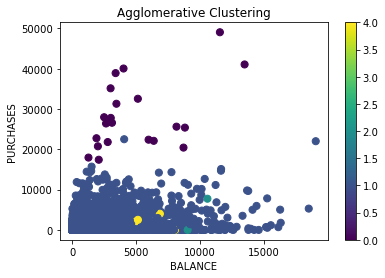

In [73]:
fig =plt.figure()
ax = fig.add_subplot()

scatter = ax.scatter (data_frame ['BALANCE'] , data_frame ["PURCHASES"] , c= agglomerative[0], s=50)

ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")

plt.colorbar(scatter)


#####      C - Dendogram

### 2 - Partitional Clustering (K- Means)

#####      A- Build Model

In [74]:
#Importing our clustering algorithm: KMeans
from sklearn.cluster import KMeans  

kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit_predict(data_frame)

array([0, 1, 1, ..., 0, 0, 0])

In [75]:
#K-means Labels
labels=pd.DataFrame(kmeans.labels_)
labels.value_counts()

0    5616
1    2574
2     679
4      56
3      25
dtype: int64

#####      B- Plot Model

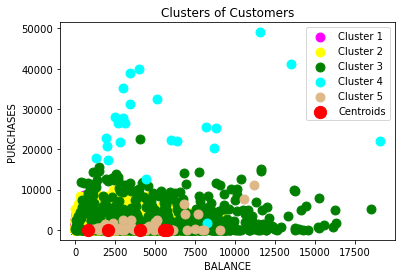

In [76]:
plt.scatter(data_frame["BALANCE"]   [labels[0] == 0],          
            data_frame["PURCHASES"]   [labels[0] == 0],s=80,c='magenta',label='Cluster 1')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 1],
           data_frame["PURCHASES"]   [labels[0] == 1],s=80,c='yellow',label='Cluster 2')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 2],
           data_frame["PURCHASES"]   [labels[0] == 2],s=80,c='green',label='Cluster 3')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 3], 
           data_frame["PURCHASES"]   [labels[0] == 3],s=80,c='cyan',label='Cluster 4')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 4], 
           data_frame["PURCHASES"]   [labels[0] == 4],s=80,c='burlywood',label='Cluster 5')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

### 3 - Partitional Clustering (K- Means) Using Elbow Method

#####      A- Build Model

In [110]:
sum_of_squared_distances = []
k = range(1,15)
for k in k:
    km = KMeans(n_clusters=k)
    km = km.fit(data_frame)
    sum_of_squared_distances.append(km.inertia_)


#####      B- Plot Elbow Method

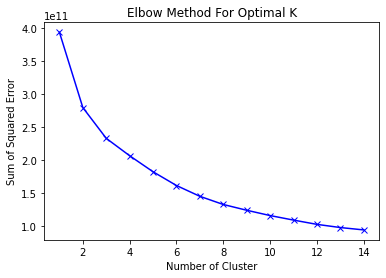

In [78]:
plt.plot(range(1, 15), sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Method For Optimal K')
plt.show()

* Using the elbow method, we pick a good number of clusters to be 7 or 8

#####      C- Build Model with 7 Cluster

In [79]:
#Cluster our data by choosing 7 as number of clusters
kmeans=KMeans(n_clusters=7, random_state=0)  
kmeans.fit_predict(data_frame)

array([0, 1, 5, ..., 0, 0, 0])

In [80]:
#K-means Labels
labels=pd.DataFrame(kmeans.labels_)
labels.value_counts()

0    5231
5    2389
1     775
2     345
3     130
4      56
6      24
dtype: int64

#####      D- Plot Model ( 7 Cluster)

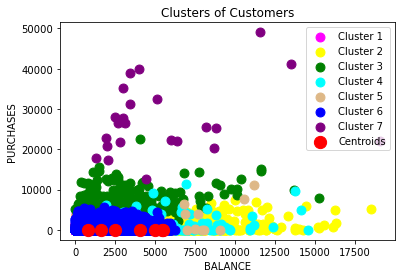

In [81]:
plt.scatter(data_frame["BALANCE"]   [labels[0] == 0],          
            data_frame["PURCHASES"]   [labels[0] == 0],s=80,c='magenta',label='Cluster 1')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 1],
           data_frame["PURCHASES"]   [labels[0] == 1],s=80,c='yellow',label='Cluster 2')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 2],
           data_frame["PURCHASES"]   [labels[0] == 2],s=80,c='green',label='Cluster 3')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 3], 
           data_frame["PURCHASES"]   [labels[0] == 3],s=80,c='cyan',label='Cluster 4')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 4], 
           data_frame["PURCHASES"]   [labels[0] == 4],s=80,c='burlywood',label='Cluster 5')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 5], 
           data_frame["PURCHASES"]   [labels[0] == 5],s=80,c='blue',label='Cluster 6')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 6], 
           data_frame["PURCHASES"]   [labels[0] == 6],s=80,c='purple',label='Cluster 7')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

#####      E- Build Model with 8 Cluster

In [82]:
#Cluster our data by choosing 8 as number of clusters
kmeans=KMeans(n_clusters=8, random_state=0)  
kmeans.fit_predict(data_frame)

array([0, 1, 5, ..., 0, 0, 0])

In [83]:
#K-means Labels
labels=pd.DataFrame(kmeans.labels_)
labels.value_counts()

0    5232
5    1725
1    1040
4     446
2     335
3     112
6      37
7      23
dtype: int64

#####      F- Plot Model ( 8 Cluster)

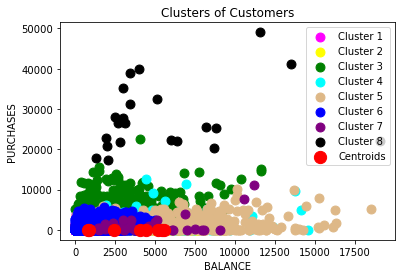

In [84]:
plt.scatter(data_frame["BALANCE"]   [labels[0] == 0],          
            data_frame["PURCHASES"]   [labels[0] == 0],s=80,c='magenta',label='Cluster 1')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 1],
           data_frame["PURCHASES"]   [labels[0] == 1],s=80,c='yellow',label='Cluster 2')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 2],
           data_frame["PURCHASES"]   [labels[0] == 2],s=80,c='green',label='Cluster 3')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 3], 
           data_frame["PURCHASES"]   [labels[0] == 3],s=80,c='cyan',label='Cluster 4')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 4], 
           data_frame["PURCHASES"]   [labels[0] == 4],s=80,c='burlywood',label='Cluster 5')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 5], 
           data_frame["PURCHASES"]   [labels[0] == 5],s=80,c='blue',label='Cluster 6')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 6], 
           data_frame["PURCHASES"]   [labels[0] == 6],s=80,c='purple',label='Cluster 7')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 7], 
           data_frame["PURCHASES"]   [labels[0] == 7],s=80,c='black',label='Cluster 8')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

## Bonus Section


#### The Silhouette Method

* The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

In [85]:
from sklearn.metrics import silhouette_score

sil = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k).fit(data_frame)
    labels = kmeans.labels_
    sil.append(silhouette_score(data_frame, labels, metric = 'euclidean'))


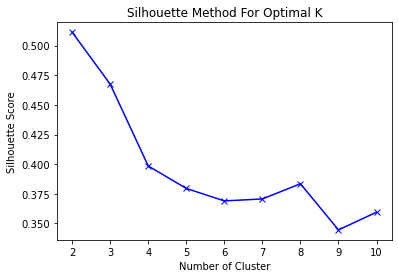

In [86]:
plt.plot(range(2, 11), sil, 'bx-')
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal K')
plt.show()

 * There is a clear peak at k = 2. So, it is optimal.

#####      Build Model with 2 Cluster

In [87]:
#Cluster our data by choosing 8 as number of clusters
kmeans=KMeans(n_clusters=2, random_state=0)  
kmeans.fit_predict(data_frame)

array([1, 0, 1, ..., 1, 1, 1])

In [88]:
#K-means Labels
labels=pd.DataFrame(kmeans.labels_)
labels.value_counts()

1    7024
0    1926
dtype: int64

#####       Plot Model ( 2 Cluster)

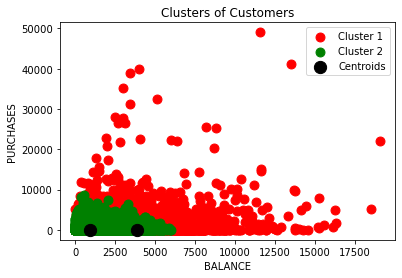

In [89]:
plt.scatter(data_frame["BALANCE"]   [labels[0] == 0],          
            data_frame["PURCHASES"]   [labels[0] == 0],s=80,c='red',label='Cluster 1')

plt.scatter(data_frame["BALANCE"]   [labels[0] == 1],
           data_frame["PURCHASES"]   [labels[0] == 1],s=80,c='green',label='Cluster 2')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='black', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

---

# Test Section

---

In [100]:
data_frame.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [101]:
df = data_frame[['BALANCE','PURCHASES']]
df

,BALANCE,PURCHASES
0,40.900749,95.40
1,3202.467416,0.00
2,2495.148862,773.17
3,1666.670542,1499.00
4,817.714335,16.00
...,...,...
8945,28.493517,291.12
8946,19.183215,300.00
8947,23.398673,144.40
8948,13.457564,0.00


In [102]:
kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [103]:
#K-means Labels
labels=pd.DataFrame(kmeans.labels_)
labels.value_counts()

0    7534
2    1271
1     145
dtype: int64

In [104]:
df

,BALANCE,PURCHASES
0,40.900749,95.40
1,3202.467416,0.00
2,2495.148862,773.17
3,1666.670542,1499.00
4,817.714335,16.00
...,...,...
8945,28.493517,291.12
8946,19.183215,300.00
8947,23.398673,144.40
8948,13.457564,0.00


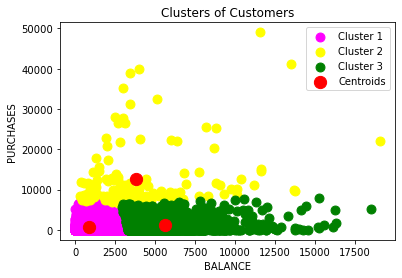

In [105]:
plt.scatter(df["BALANCE"]   [labels[0] == 0],          
            df["PURCHASES"]   [labels[0] == 0],s=80,c='magenta',label='Cluster 1')

plt.scatter(df["BALANCE"]   [labels[0] == 1],
           df["PURCHASES"]   [labels[0] == 1],s=80,c='yellow',label='Cluster 2')

plt.scatter(df["BALANCE"]   [labels[0] == 2],
           df["PURCHASES"]   [labels[0] == 2],s=80,c='green',label='Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

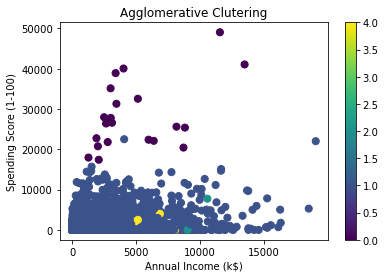

In [106]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ['BALANCE'] , df ["PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
plt.colorbar(scatter)